In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
species_name = le.classes_

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
X = df.drop(columns=['Id','Species'])

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = df['Species']

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [12]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=7)

In [14]:
X_train.shape

(112, 4)

In [15]:
df.shape

(150, 6)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[-0.87222549,  1.03373066, -1.29757475, -1.14224315],
       [ 1.47325482, -0.11714244,  1.21000835,  1.18377926],
       [ 1.00415875,  0.57338142,  1.09856022,  1.18377926],
       [ 1.12143277, -0.57749168,  0.5970436 ,  0.27921499],
       [ 0.65233671, -0.57749168,  1.04283615,  1.31300273],
       [ 0.76961072, -0.11714244,  0.98711208,  0.79610886],
       [-0.1685814 , -0.11714244,  0.26269918,  0.02076806],
       [-0.9894995 ,  0.57338142, -1.29757475, -1.27146661],
       [ 1.00415875,  0.11303218,  0.37414732,  0.27921499],
       [ 0.18324065, -1.95853941,  0.15125104, -0.23767888],
       [ 0.65233671, -0.8076663 ,  0.87566394,  0.92533233],
       [-1.34132155,  0.3432068 , -1.18612661, -1.27146661],
       [-1.45859556,  0.11303218, -1.24185068, -1.27146661],
       [-0.87222549,  0.80355604, -1.24185068, -1.27146661],
       [ 2.17689891,  1.72425453,  1.6558009 ,  1.31300273],
       [-1.81041761, -0.11714244, -1.46474695, -1.40069008],
       [ 0.53506269,  0.

In [18]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=3)

In [19]:
y_train[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [20]:
def get_models():
    model = Sequential([
        Dense(units=32,input_shape=(4,),activation='relu'),
        Dense(units=32,activation='relu'),
        Dropout(0.5),
        Dense(units=3,activation='softmax')
    ])
    
    return model

In [21]:
model = get_models()
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,epochs=100, verbose=2)

Epoch 1/100


4/4 - 5s - loss: 1.1782 - accuracy: 0.4286 - 5s/epoch - 1s/step
Epoch 2/100
4/4 - 0s - loss: 1.1002 - accuracy: 0.4643 - 57ms/epoch - 14ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9784 - accuracy: 0.5982 - 53ms/epoch - 13ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9555 - accuracy: 0.5446 - 50ms/epoch - 13ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9473 - accuracy: 0.5357 - 37ms/epoch - 9ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8396 - accuracy: 0.6429 - 41ms/epoch - 10ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8038 - accuracy: 0.7321 - 44ms/epoch - 11ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7802 - accuracy: 0.6696 - 49ms/epoch - 12ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7003 - accuracy: 0.8036 - 49ms/epoch - 12ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6737 - accuracy: 0.7589 - 34ms/epoch - 8ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6524 - accuracy: 0.7768 - 38ms/epoch - 10ms/step
Epoch 12/100
4/4 - 0s - loss: 0.5867 - accuracy: 0.8125 - 42ms/epoch - 10ms/step
Epoch 13/100
4/4 - 0s - loss: 0.5898 - ac

Epoch 97/100
4/4 - 0s - loss: 0.1015 - accuracy: 0.9643 - 77ms/epoch - 19ms/step
Epoch 98/100
4/4 - 0s - loss: 0.1026 - accuracy: 0.9643 - 82ms/epoch - 20ms/step
Epoch 99/100
4/4 - 0s - loss: 0.0908 - accuracy: 0.9911 - 60ms/epoch - 15ms/step
Epoch 100/100
4/4 - 0s - loss: 0.0764 - accuracy: 0.9821 - 44ms/epoch - 11ms/step


In [23]:
prediction = model.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [25]:
prediction

array([[3.44246184e-03, 7.00593516e-02, 9.26498294e-01],
       [4.33081724e-02, 7.43271530e-01, 2.13420242e-01],
       [9.99920607e-01, 5.95568781e-05, 1.98293874e-05],
       [3.23287509e-02, 6.95189893e-01, 2.72481382e-01],
       [3.57953552e-03, 8.72883141e-01, 1.23537295e-01],
       [2.67181516e-01, 7.32589424e-01, 2.29085868e-04],
       [7.10327597e-03, 7.55987048e-01, 2.36909643e-01],
       [4.86757327e-03, 9.78542447e-01, 1.65900178e-02],
       [9.99895930e-01, 8.30108911e-05, 2.10411872e-05],
       [2.53647640e-02, 7.75089979e-01, 1.99545339e-01],
       [3.09623801e-03, 2.46498495e-01, 7.50405252e-01],
       [1.15238674e-01, 5.91247916e-01, 2.93513328e-01],
       [9.99987960e-01, 6.84595898e-06, 5.19166770e-06],
       [5.87773284e-05, 3.28474189e-03, 9.96656418e-01],
       [9.99842525e-01, 1.24503727e-04, 3.28927235e-05],
       [1.48786483e-02, 1.67244107e-01, 8.17877173e-01],
       [1.05387859e-04, 5.64445034e-02, 9.43450093e-01],
       [1.41245674e-03, 4.12341

In [30]:
prediction = np.argmax(prediction,axis=-1)

In [31]:
prediction

array([2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0], dtype=int64)

In [32]:
y_test

149    2
84     1
40     0
66     1
106    2
41     0
52     1
94     1
11     0
51     1
77     1
85     1
32     0
109    2
28     0
70     1
108    2
137    2
46     0
37     0
82     1
120    2
63     1
119    2
129    2
138    2
97     1
80     1
101    2
140    2
126    2
79     1
22     0
139    2
74     1
45     0
36     0
5      0
Name: Species, dtype: int32

In [38]:
acury = accuracy_score(y_test,prediction)
acury

0.868421052631579

In [39]:
cm = confusion_matrix(y_test,prediction)
cm

array([[10,  1,  0],
       [ 0, 12,  2],
       [ 0,  2, 11]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

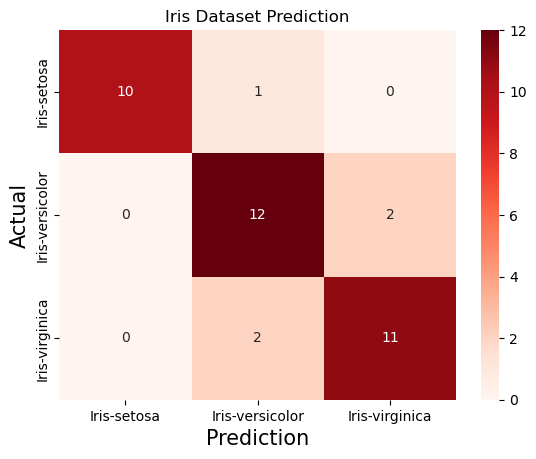

In [49]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds',xticklabels=species_name,yticklabels=species_name)
ax.set_title("Iris Dataset Prediction")
ax.set_xlabel('Prediction',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)